<a href="https://colab.research.google.com/github/moosemaniam/IISCDeepLearning/blob/main/M1_AST_08_Scalable_Programming_using_PySpark_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 8: Scalable Programming using PySpark

## Learning Objectives

At the end of the experiment, you will be able to


* understand about Big Data, Spark, and PySpark
* understand design and architecture of Spark
* interact with Spark using python
* understand and implement RDD actions and transformations






### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_08_Scalable_Programming_using_PySpark_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/ecommerce_customers_.csv")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Introduction to Big Data, Spark, and PySpark

**Big Data** : Big Data refers to the large volumes of data generated on a daily basis that is impossible to store and process using traditional methods. It can be structured as well as unstructured data. 

Big Data helps businesses analyze and get insights from the data to make effective business strategies.

Now, Big Data is described using four V's and they are:

1. **Volume(Scale of Data)**: Organizations collect data from a variety of sources, including business transactions, IoT devices, smart phones, industrial equipment, videos, social media and many more. In the past, storing it would have been a problem – but cheaper storage on platforms like Hadoop have eased the burden. 

  **Example**: All the credit/debit card transactions on a day in the world will generate large volumes of data.

2. **Velocity(Analysis of Streaming Data)**: Velocity refers to the speed with which data is generated. High velocity data is generated with such a pace that it requires distinct (distributed) processing techniques. 

  **Example** : Twitter messages , WhatsApp messages, or Facebook posts will generate data with a high velocity.


3. **Variety(Different Forms of Data)**: variety is going to mean greater uncertainty about the quality of that data and its availability. Big Data comes from a great variety of sources and generally is one out of three types: structured, semi structured and unstructured data. 

  **Example** : The data generated by CCTV audio and video files at various locations in a city High will be a high variety data.

4. **Veracity(Uncertainty of Data)**: Veracity refers to the quality of the data that is being analyzed. High veracity data has many records that are valuable to analyze and that contribute in a meaningful way to the overall results. Low veracity data, on the other hand, contains a high percentage of meaningless data. Further, the non-valuable in these data sets is referred to as noise. 

  **Example** : The  data from a medical experiment or trial of a vaccine is an example of a high veracity data.

Data that is **high volume**, **high velocity**, **high veracity** and **high variety** must be processed with advanced tools (analytics and algorithms) to reveal meaningful information. Because of these characteristics of the data, the knowledge domain that deals with the storage, processing, and analysis of these data sets has been labeled **Big Data**.


### What is Spark ?

Spark is a platform for cluster computing that lets you spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.


**Spark : A Distributed Execution Engine**

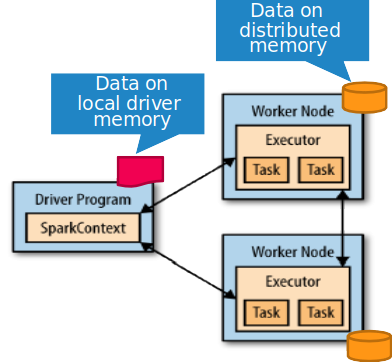

**Driver**: User program for application,
uses Spark Context, local variables
Spark Context: Gives access to
distributed computing environment.

**Worker**: Machines on which actual
heavy-lift happens.

**Executor**: Spark execution
environment in a worker, Process,
exclusive to an application.

**Task**: Single operation on data and thread.

**Why do we need Spark?**

Spark is one of the latest technologies being used to quickly and easily handle Big Data. Spark is an open-source distributed computing framework that promises a clean and pleasurable experience similar to that of Pandas, while scaling to large data sets via a distributed architecture under the hood. 

**What is Apache Spark?**

Apache Spark is known as a fast, easy to use and general engine for big data processing, with built-in modules for streaming, SQL, machine learning and graph processing. It’s well-known for its speed, ease of use, generality and the ability to run virtually everywhere. And even though Spark is one of the most asked tools for data engineers, also data scientists can benefit from Spark when doing exploratory data analysis, feature extraction, supervised learning and model evaluation.

Apache Spark is a powerful cluster computing engine, therefore it is designed for fast computation of big data. Spark runs on Memory (RAM), and that makes the processing much faster than on Disk. It includes "MLlib" library to perform Machine Learning tasks using the Spark framework.

### What is PySpark?

PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.

<figure>
<img src='https://cdn.iisc.talentsprint.com/CDS/Images/pyspark_components.png' width = 700 px/>
</figure>

**Spark SQL and DataFrame**

Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrame and can also act as distributed SQL query engine.

**Streaming**

Running on top of Spark, the streaming feature in Apache Spark enables powerful interactive and analytical applications across both streaming and historical data, while inheriting Spark’s ease of use and fault tolerance characteristics.

**MLlib**

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

**Spark Core**

Spark Core is the underlying general execution engine for the Spark platform on top of which all other functionality is built. It provides an RDD (Resilient Distributed Dataset) and in-memory computing capabilities.

#### Install PySpark

In [ ]:
!pip install pyspark

#### Start a Spark Session

Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0. It provides a way to interact with various spark’s functionality with a lesser number of constructs. Instead of having spark context, hive context, SQL context, now everything is encapsulated in a Spark session.

In [ ]:
from pyspark.sql import SparkSession
# Start spark session
spark = SparkSession.builder.appName('PySpark').getOrCreate()
spark

### Spark RDD

**Resilient Distributed Datasets:**

**Resilient:**    because RDDs are immutable (can’t be modified once created)                        and fault tolerant.

**Distributed:**  because it is distributed across clusters

**Dataset:**      because it holds data.

**Why RDD?**

* Apache Spark lets you treat your input files almost like any other variable, which you cannot do in Hadoop MapReduce. 
* RDDs are automatically distributed across the network by means of Partitions.

RDDs are divided into smaller chunks called Partitions, and when you execute some action, a task is launched per partition. This means, the more the number of partitions, the more will be the parallelism. 

Spark automatically decides the number of partitions that an RDD has to be divided into, but you can also specify the number of partitions when creating an RDD. These partitions of an RDD are distributed across all the nodes in the network.

**Difference between Dataframe and RDD (Resilient Distributed Datasets):**

**Dataframe:**
* Automatically finds out the schema of the dataset.
* Performs aggregation faster than RDDs, as it provides an easy API to perform aggregation operations.

**RDD:**
* We need to define the schema manually.
* RDD is slower than Dataframes to perform simple operations like grouping the data.


**Creating an RDD**

**There are three ways to create an RDD in Spark:**
1. Parallelizing already existing collection in the driver program.
 
  The key point to note in a parallelized collection is the number of partitions the dataset is divided into. Spark will run one task for each partition of the cluster. We require two to four partitions for each CPU in the cluster. Spark sets the number of partition based on our cluster. 

2. Referencing a dataset in an external storage system (e.g. HDFS, Hbase, shared file system).
  
  In Spark, the distributed dataset can be formed from any data source supported by Hadoop, including the local file system, HDFS, Cassandra, HBase etc. In this, the data is loaded from the external dataset.

  * csv (String path): It loads a CSV file and returns the result as a Dataset.

  * json (String path): It loads a JSON file (one object per line) and returns the result as a Dataset

  * textFile (String path) It loads text files and returns a Dataset of String.

3. Creating RDD from already existing RDDs.

  Transformation mutates one RDD into another RDD, this transformation is the way to create an RDD from an already existing RDD. This creates a difference between Apache Spark and Hadoop MapReduce. 

**Actions/Transformations**

There are two types of operations that you can perform on an RDD- 
* Transformations 
* Actions. 

**Transformation** applies some function on an RDD and creates a new RDD, it does not modify the RDD that you apply the function on. Also, the new RDD keeps a pointer to its parent RDD.

When you call a transformation, Spark does not execute it immediately, instead it creates a lineage. A lineage keeps track of what all transformations have to be applied on that RDD, including from where it has to read the data.


**Action** is used to either save the result to some location or to display it. You can also print the RDD lineage information by using the command: 

"filtered.toDebugString" -> (*filtered* is the RDD here).

![img](https://cdn.iisc.talentsprint.com/CDS/Images/Pyspark_RDD.JPG)

ETL (Extract, Transform, and Load) is the procedure of migrating data from one system to another.
* Data **extraction** is the process of retrieving data out of homogeneous or heterogeneous sources for further data processing and data storage.
* During data **transformation**, the data is cleaned and incorrect or inaccurate records are modified or deleted.
* Finally, the processed data is **loaded** (or stored) into a target system such as a data warehouse or NoSQL database or RDBMS.

Data engineers use Spark because it provides a simple way to parallelize computations and hides all the complexity of distribution and fault tolerance. This leaves them free to focus on using high-level DataFrame-based APIs and domain-specific language queries to do ETL, reading and combining data from multiple sources.

Here we will consider tabular data to do ETL operations. Starting from data extraction, we will perform various transformations and try to gain some insights from it and then load it to a NoSQL database or store it in different file formats.

**sparkContext**: It is the main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster and can be used to create RDD's. It establishes the communication with the clusters and resource managers in order to coordinate and execute tasks.

In [ ]:
# CODE HERE

### Spark Python Transformations

#### Create RDD's and use the transformation functions on the RDD.  

**map()** - A map transformation is useful when we need to transform an RDD by applying a function to each element. 

In [ ]:
# CODE HERE

In the above cell, we have to just perform a transformation and that is why we will not see any output. 

Further, let us perform action on the transformation that we applied and observe the output.

In [ ]:
# CODE HERE

**take()** - Take the first num elements of the RDD.

It works by first scanning one partition, and use the results from that partition to estimate the number of additional partitions needed to satisfy the limit

In [ ]:
# CODE HERE

**flatMap()** - The flatMap transformation will return a new RDD by first applying a function to all elements of this RDD, and then flattening the results. This is the main difference between the flatMap and *map transformations.*

In [ ]:
# CODE HERE

Compare the same function using map()

In [ ]:
# CODE HERE

**filter()** - The filter transformation returns a new dataset formed by selecting  those elements of the source on which function returns true.

In [ ]:
# CODE HERE

**groupByKey()** - We can apply the “groupByKey” transformations on (key,val) pair RDD. The “groupByKey” will group the values for each key in the original RDD. It will create a new pair, where the original key corresponds to this collected group of values.

In [ ]:
# CODE HERE

**reduceByKey()** - Merge the values for each key using an associative reduce function.

In [ ]:
# CODE HERE

**mapPartitions()** - Is similar to map, but runs separately on each partition (block) of the RDD

In [ ]:
# CODE HERE

**mapPartitionsWithIndex()** - Return a new RDD by applying a function to each partition of this RDD, while tracking the index of the original partition.

In [ ]:
# CODE HERE

### Spark Python Actions

**Create an RDD to explain "RDD actions with Examples"**

In [ ]:
# CODE HERE

After creating RDDs, we use these RDD's when it is necessary to demonstrate the RDD actions.

**first()** – Return the first element in the dataset.

In [ ]:
# CODE HERE

**take()** – Return the first num elements of the dataset.

In [ ]:
# CODE HERE

**takeSample()** – Return the subset of the dataset in an Array.

In [ ]:
# CODE HERE

**takeOrdered()** – Return the first num (smallest) elements from the dataset and this is the opposite of the take() action. 

In [ ]:
# CODE HERE

**collect()** - Return the complete dataset as an Array.

In [ ]:
# CODE HERE

**count()** – Return the count of elements in the dataset.

In [ ]:
# CODE HERE

**countByValue()** – Return Map[T,Long] key representing each unique value in dataset and value represents count each value present.

In [ ]:
# CODE HERE

**reduce()** – Reduces the elements of the dataset using the specified binary operator.

In [ ]:
# CODE HERE

**top()** – Return top n elements from the dataset.

In [ ]:
# CODE HERE

**fold()** - Aggregate the elements of each partition, and then the results for all the partitions, using a given associative function and a neutral "zero value."

In [ ]:
# CODE HERE

**foldByKey()** -  is quite similar to fold(), both use a zero value of the same type of the data in our RDD and combination function.

In [ ]:
# CODE HERE

**reduceByKey()** - Merge the values for each key using an associative reduce function.

In [ ]:
# CODE HERE

**combineByKey()** - Generic function to combine the elements for each key using a custom set of aggregation functions.

In [ ]:
# CODE HERE

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. What is True about PySpark SparkContext? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","SparkContext uses Py4J in order to launch a JVM", "It does not creates a JavaSparkContext", "It connects to spark cluster to create new SparkContext object", "Both A and C"]


####Details on Spark
1.  Spark processes data in batches as well as in real-time
2.  Spark stores data in the RAM i.e. in-memory. So, it is easier to retrieve it
3.  Spark provides caching and in-memory data storage
4.  Spark neither processes data in batches nor in real-time

In [ ]:
#@title Q.2. Consider the above four points and select the correct option that best answers how is Apache Spark different from MapReduce? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","1 Only", "4 Only", "1, 2 and 3", "2 and 3 only"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")